# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats as st

# # Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Testing single query before making multiple requests
url = "https://api.openweathermap.org/data/2.5/weather?units=metric&q="
city_data = []
city_url = f"{url}{cities[0]}&appid={weather_api_key}"
# print(weather_api_key)
print(cities[0])
payload_test = requests.get(city_url).json()
city_lat = payload_test['coord']['lat']
city_lng = payload_test['coord']['lon']
city_max_temp = payload_test['main']['temp_max']
city_humidity = payload_test['main']['humidity']
city_clouds = payload_test['clouds']['all']
city_wind = payload_test['wind']
city_country = payload_test['sys']['country']
city_date = payload_test['dt']
# Append the City information into city_data list
city_data.append({"City": cities[0], 
                  "Lat": city_lat, 
                  "Lng": city_lng, 
                  "Max Temp": city_max_temp,
                  "Humidity": city_humidity,
                  "Cloudiness": city_clouds,
                  "Wind Speed": city_wind,
                  "Country": city_country,
                  "Date": city_date})
city_data

port-aux-francais


[{'City': 'port-aux-francais',
  'Lat': -49.35,
  'Lng': 70.2167,
  'Max Temp': 1.97,
  'Humidity': 82,
  'Cloudiness': 98,
  'Wind Speed': {'speed': 16.88, 'deg': 251, 'gust': 19.62},
  'Country': 'TF',
  'Date': 1695754669}]

In [4]:
# # Set the API base URL
# url = "https://api.openweathermap.org/data/2.5/weather?q="

# # Define an empty list to fetch the weather data for each city
# city_data = []

# # Print to logger
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters
# record_count = 1
# set_count = 1

# # Loop through all the cities in our list to fetch weather data
# for i, city in enumerate(cities):
        
#     # Group cities in sets of 50 for logging purposes
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 0

#     # Create endpoint URL with each city
#     city_url = f"{url}{city}&appid={weather_api_key}"
#     print(city_url)
#     # Log the url, record, and set numbers
#     print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#     # Add 1 to the record count
#     record_count += 1

#     # Run an API request for each of the cities
#     try:
#         # Parse the JSON and retrieve data
#         city_weather = requests.get(city_url).json()

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
#         city_lat = city_weather['coord']['lat']
#         city_lng = city_weather['coord']['lon']
#         city_max_temp = city_weather['main']['temp_max']
#         city_humidity = city_weather['main']['humidity']
#         city_clouds = city_weather['clouds']
#         city_wind = city_weather['wind']
#         city_country = city_weather['sys']['country']
#         city_date = city_weather['dt']

#         # Append the City information into city_data list
#         city_data.append({"City": city, 
#                           "Lat": city_lat, 
#                           "Lng": city_lng, 
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})

#     # If an error is experienced, skip the city
#     except:
#         print("City not found. Skipping...")
#         continue
              
# # Indicate that Data Loading is complete 
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

In [5]:
# Rewrote the code above for better exception handling. 
def city_data_retreival(cities_list):
    city_data = []
    url = "https://api.openweathermap.org/data/2.5/weather?units=metric&q="
    record_count = 1
    set_count = 1
    for i, city in enumerate(cities_list):
        city_url = f"{url}{city}&appid={weather_api_key}"
        print(city_url)
        response = requests.get(url)
        # Group cities in sets of 50 for logging purposes
        if (i % 50 == 0 and i >= 50):
            set_count += 1
            record_count = 0
        # Log the url, record, and set numbers
        print(f"Processing Record of {city}")
        # Add 1 to the record count
        record_count += 1
        response = requests.get(city_url)
        if response.status_code == 200:
            try:
                response = response.json()
                city_lat = response['coord']['lat']
                city_lng = response['coord']['lon']
                city_max_temp = response['main']['temp_max']
                city_humidity = response['main']['humidity']
                city_clouds = response['clouds']['all']
                city_wind = response['wind']['speed']
                city_country = response['sys']['country']
                city_date = response['dt']
                # Append the City information into city_data list
                city_data.append({"City": city, 
                                  "Lat": city_lat, 
                                  "Lng": city_lng, 
                                  "Max Temp": city_max_temp,
                                  "Humidity": city_humidity,
                                  "Cloudiness": city_clouds,
                                  "Wind Speed": city_wind,
                                  "Country": city_country,
                                  "Date": city_date})
            except NameError:
                print(f"Name not found.")
            except KeyError:
                print("Key not found")
            except Exception:
                print('We hit an exception that is not a NameError or TypeError!')
        elif response.status_code == 404:
            print(f'404 {city} not found')
            continue
        elif response.status_code == 400:
            print('400 Bad Request')
            break
    return city_data
    

In [6]:
# Data retreival 
city_weather_payload = city_data_retreival(cities)

https://api.openweathermap.org/data/2.5/weather?units=metric&q=port-aux-francais&appid=36427b6e675f02987085f8545a5d72ce
Processing Record of port-aux-francais
https://api.openweathermap.org/data/2.5/weather?units=metric&q=mugumu&appid=36427b6e675f02987085f8545a5d72ce
Processing Record of mugumu
https://api.openweathermap.org/data/2.5/weather?units=metric&q=port mathurin&appid=36427b6e675f02987085f8545a5d72ce
Processing Record of port mathurin
https://api.openweathermap.org/data/2.5/weather?units=metric&q=ribeira grande&appid=36427b6e675f02987085f8545a5d72ce
Processing Record of ribeira grande
https://api.openweathermap.org/data/2.5/weather?units=metric&q=blackmans bay&appid=36427b6e675f02987085f8545a5d72ce
Processing Record of blackmans bay
https://api.openweathermap.org/data/2.5/weather?units=metric&q=revda&appid=36427b6e675f02987085f8545a5d72ce
Processing Record of revda
https://api.openweathermap.org/data/2.5/weather?units=metric&q=puerto rico&appid=36427b6e675f02987085f8545a5d72ce


In [27]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_weather_payload)

# Exporting to csv
city_data_df.to_csv("../output_data/city_weather.csv")

In [28]:
# Show Record Count
city_data_df = pd.read_csv("../output_data/city_weather.csv")
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  561 non-null    int64  
 1   City        561 non-null    object 
 2   Lat         561 non-null    float64
 3   Lng         561 non-null    float64
 4   Max Temp    561 non-null    float64
 5   Humidity    561 non-null    int64  
 6   Cloudiness  561 non-null    int64  
 7   Wind Speed  561 non-null    float64
 8   Country     557 non-null    object 
 9   Date        561 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 44.0+ KB


In [9]:
# Display sample data
city_data_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,port-aux-francais,-49.3500,70.2167,1.97,82,98,16.88,TF,1695754669
1,1,mugumu,-1.8500,34.7000,19.09,76,40,0.96,TZ,1695754670
2,2,port mathurin,-19.6833,63.4167,22.92,65,2,9.37,MU,1695754435
3,3,ribeira grande,38.5167,-28.7000,23.22,94,40,8.23,PT,1695754418
4,4,blackmans bay,-43.0167,147.3167,5.85,91,80,1.94,AU,1695754056


In [10]:
# Export the City_Data into a csv
# city_data_df.to_csv("cities.csv", index_label="City_ID")

In [11]:
# # Read saved data
# city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# # Display sample data
# city_data_df.head()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

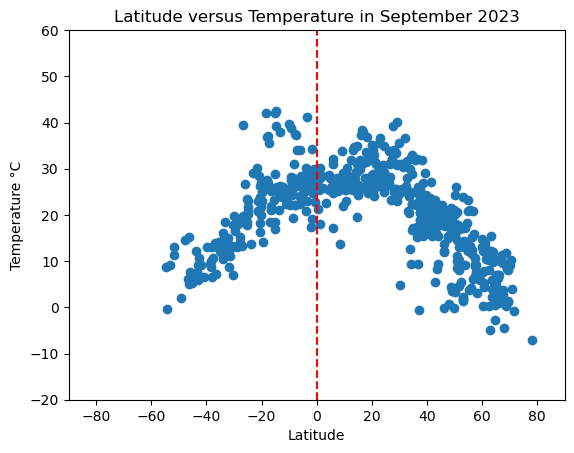

In [29]:
# Build scatter plot for latitude vs. temperature
fig0, ax0 = plt.subplots()
ax0.scatter(x=city_data_df['Lat'], y=city_data_df['Max Temp'])
# Incorporate the other graph properties
ax0.set_xlabel("Latitude")
ax0.set_ylabel("Temperature °C")
ax0.set_title("Latitude versus Temperature in September 2023")
ax0.set_xlim(-90, 90)
ax0.set_ylim(-20, 60)
ax0.axvline(0, linestyle='dashed', color='red')
# Save the figure
plt.savefig("../output_data/Fig1.png")
# Show plot
plt.show()

#### Latitude Vs. Humidity

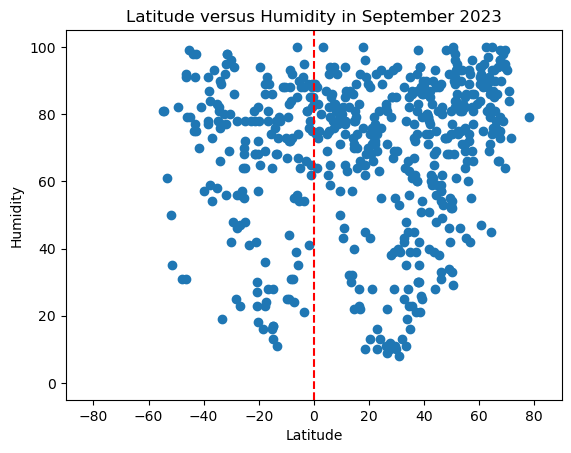

In [13]:
# Build the scatter plots for latitude vs. humidity
fig1, ax1 = plt.subplots()
ax1.scatter(x=city_data_df['Lat'], y=city_data_df['Humidity'])

# Incorporate the other graph properties
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Humidity")
ax1.set_title("Latitude versus Humidity in September 2023")
ax1.set_xlim(-90, 90)
ax1.set_ylim(-5, 105)
ax1.axvline(0, linestyle='dashed', color='red')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
# plt.show()

#### Latitude Vs. Cloudiness

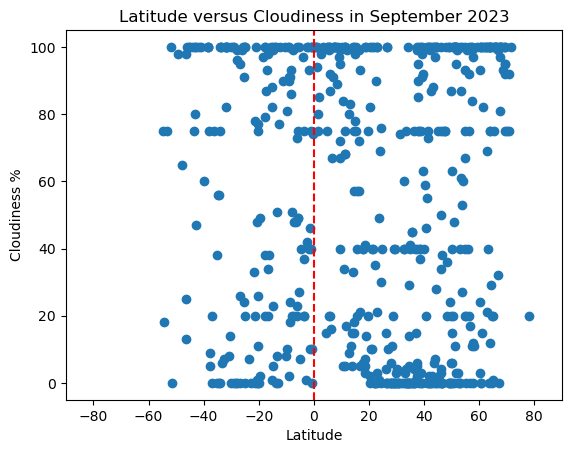

In [14]:
# Build the scatter plots for latitude vs. cloudiness
fig2, ax2 = plt.subplots()
ax2.scatter(x=city_data_df['Lat'], y=city_data_df['Cloudiness'])

# Incorporate the other graph properties
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Cloudiness %")
ax2.set_title("Latitude versus Cloudiness in September 2023")
ax2.set_xlim(-90, 90)
ax2.set_ylim(-5, 105)
ax2.axvline(0, linestyle='dashed', color='red')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

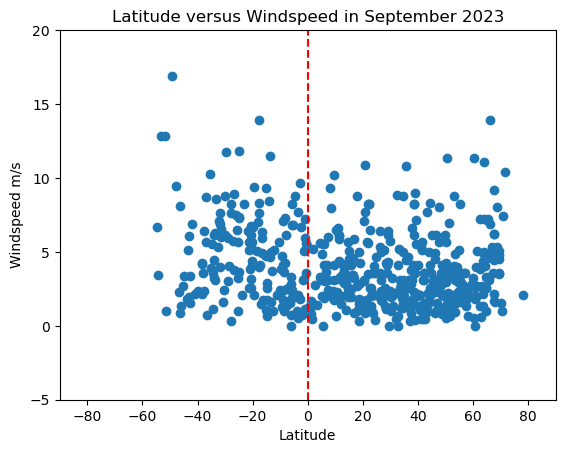

In [15]:
# Build the scatter plots for latitude vs. wind speed
fig3, ax3 = plt.subplots()
ax3.scatter(x=city_data_df['Lat'], y=city_data_df['Wind Speed'])

# Incorporate the other graph properties
ax3.set_xlabel("Latitude")
ax3.set_ylabel("Windspeed m/s")
ax3.set_title("Latitude versus Windspeed in September 2023")
ax3.set_xlim(-90, 90)
ax3.set_ylim(-5, 20)
ax3.axvline(0, linestyle='dashed', color='red')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
# Slope, intercept, rval, pval, sterr, inter_stderr
def get_lin_regress(col1, col2):
    linreg_params = st.linregress(col1, col2)
    line = (linreg_params[0] * col1) + linreg_params[1]
    equation = f"y = {round(linreg_params[0], 2)}x + {round(linreg_params[1], 2)}"
    return linreg_params, line, equation

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] > 0].reset_index(drop=True)
# Display sample data
northern_hemi_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,3,ribeira grande,38.5167,-28.7000,23.22,94,40,8.23,PT,1695754418
1,5,revda,56.8010,59.9303,6.08,92,17,2.02,RU,1695754670
2,8,wailua homesteads,22.0669,-159.3780,26.53,72,0,8.23,US,1695754419
3,12,cromwell,41.5951,-72.6454,18.58,74,100,5.66,US,1695754556
4,13,nova sintra,14.8667,-24.7167,24.23,78,98,4.28,CV,1695754672


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0].reset_index(drop=True)
# Display sample data
southern_hemi_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,port-aux-francais,-49.3500,70.2167,1.97,82,98,16.88,TF,1695754669
1,1,mugumu,-1.8500,34.7000,19.09,76,40,0.96,TZ,1695754670
2,2,port mathurin,-19.6833,63.4167,22.92,65,2,9.37,MU,1695754435
3,4,blackmans bay,-43.0167,147.3167,5.85,91,80,1.94,AU,1695754056
4,6,puerto rico,-26.7960,-55.0240,39.38,23,26,3.78,AR,1695754671


###  Temperature vs. Latitude Linear Regression Plot

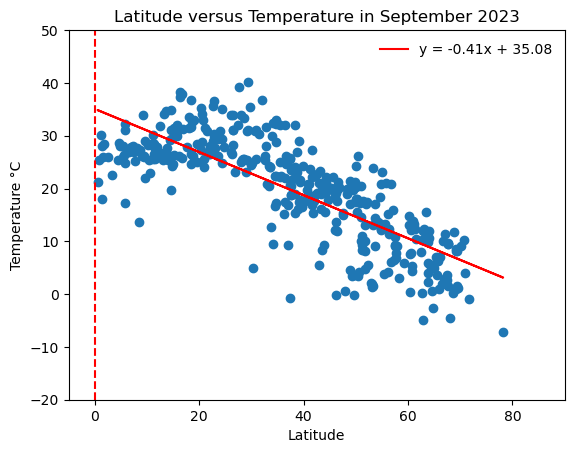

In [19]:
# Linear regression on Northern Hemisphere
lat_vs_temp_reg_param_n, lat_vs_temp_reg_n, lat_vs_temp_eq_n = get_lin_regress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
fig4, ax4 = plt.subplots()
ax4.scatter(x=northern_hemi_df['Lat'], y=northern_hemi_df['Max Temp'])
ax4.plot(northern_hemi_df['Lat'], lat_vs_temp_reg_n, color='red', linestyle='solid', label=lat_vs_temp_eq_n)
# Incorporate the other graph properties
ax4.set_xlabel("Latitude")
ax4.set_ylabel("Temperature °C")
ax4.set_title("Latitude versus Temperature in September 2023")
ax4.set_xlim(-5, 90)
ax4.set_ylim(-20, 50)
ax4.axvline(0, linestyle='dashed', color='red')
ax4.legend(frameon=False, loc='best')
# Save the figure
plt.savefig("../output_data/Fig5.png")
# Show plot
plt.show()

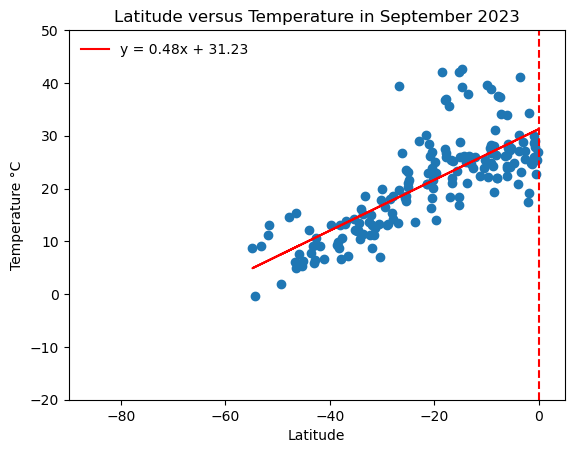

In [20]:
# Linear regression on Southern Hemisphere
lat_vs_temp_reg_param_s, lat_vs_temp_reg_s, lat_vs_temp_eq_s = get_lin_regress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
fig5, ax5 = plt.subplots()
ax5.scatter(x=southern_hemi_df['Lat'], y=southern_hemi_df['Max Temp'])
ax5.plot(southern_hemi_df['Lat'], lat_vs_temp_reg_s, color='red', linestyle='solid', label=lat_vs_temp_eq_s)
# Incorporate the other graph properties
ax5.set_xlabel("Latitude")
ax5.set_ylabel("Temperature °C")
ax5.set_title("Latitude versus Temperature in September 2023")
ax5.set_xlim(-90, 5)
ax5.set_ylim(-20, 50)
ax5.axvline(0, linestyle='dashed', color='red')
ax5.legend(frameon=False, loc='best')
# Save the figure
plt.savefig("../output_data/Fig6.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** 
- There appears to be a relationship between latitude and temperaure. And an inverse relationship between northern and southern hemispheres

### Humidity vs. Latitude Linear Regression Plot

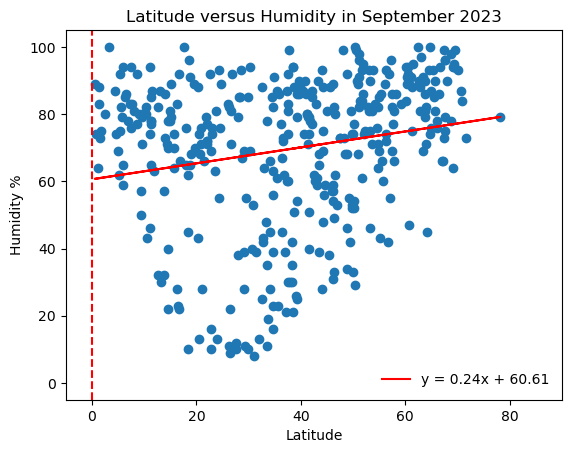

In [21]:
# Northern Hemisphere
lat_vs_hum_reg_param_n, lat_vs_hum_reg_n, lat_vs_hum_eq_n = get_lin_regress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
fig6, ax6 = plt.subplots()
ax6.scatter(x=northern_hemi_df['Lat'], y=northern_hemi_df['Humidity'])
ax6.plot(northern_hemi_df['Lat'], lat_vs_hum_reg_n, color='red', linestyle='solid', label=lat_vs_hum_eq_n)
# Incorporate the other graph properties
ax6.set_xlabel("Latitude")
ax6.set_ylabel("Humidity %")
ax6.set_title("Latitude versus Humidity in September 2023")
ax6.set_xlim(-5, 90)
ax6.set_ylim(-5, 105)
ax6.axvline(0, linestyle='dashed', color='red')
ax6.legend(frameon=False, loc='best')
# Save the figure
plt.savefig("../output_data/Fig7.png")
# Show plot
plt.show()

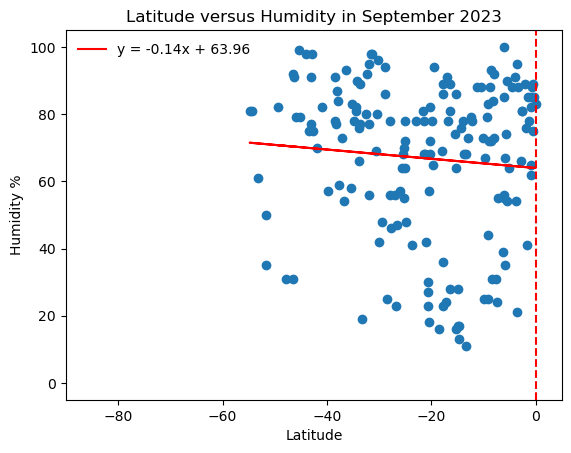

In [22]:
# Southern Hemisphere
lat_vs_hum_reg_param_s, lat_vs_hum_reg_s, lat_vs_hum_eq_s = get_lin_regress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
fig7, ax7 = plt.subplots()
ax7.scatter(x=southern_hemi_df['Lat'], y=southern_hemi_df['Humidity'])
ax7.plot(southern_hemi_df['Lat'], lat_vs_hum_reg_s, color='red', linestyle='solid', label=lat_vs_hum_eq_s)
# Incorporate the other graph properties
ax7.set_xlabel("Latitude")
ax7.set_ylabel("Humidity %")
ax7.set_title("Latitude versus Humidity in September 2023")
ax7.set_xlim(-90, 5)
ax7.set_ylim(-5, 105)
ax7.axvline(0, linestyle='dashed', color='red')
ax7.legend(frameon=False, loc='best')
# Save the figure
plt.savefig("../output_data/Fig8.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** 
- There is little/ no relationship between Latitude and Humidity

### Cloudiness vs. Latitude Linear Regression Plot

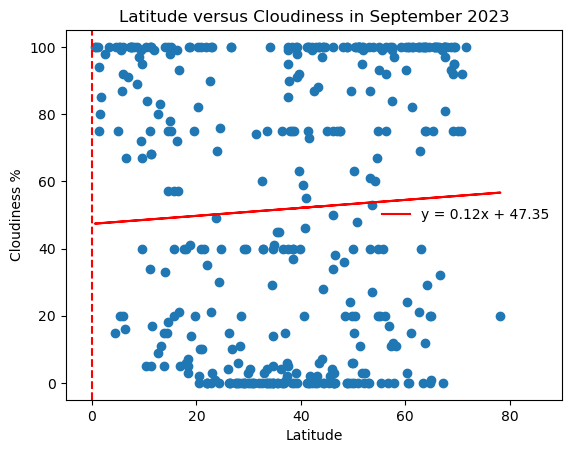

In [23]:
# Northern Hemisphere
lat_vs_cloud_reg_param_n, lat_vs_cloud_reg_n, lat_vs_cloud_eq_n = get_lin_regress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
fig8, ax8 = plt.subplots()
ax8.scatter(x=northern_hemi_df['Lat'], y=northern_hemi_df['Cloudiness'])
ax8.plot(northern_hemi_df['Lat'], lat_vs_cloud_reg_n, color='red', linestyle='solid', label=lat_vs_cloud_eq_n)
# Incorporate the other graph properties
ax8.set_xlabel("Latitude")
ax8.set_ylabel("Cloudiness %")
ax8.set_title("Latitude versus Cloudiness in September 2023")
ax8.set_xlim(-5, 90)
ax8.set_ylim(-5, 105)
ax8.axvline(0, linestyle='dashed', color='red')
ax8.legend(frameon=False, loc='best')
# Save the figure
plt.savefig("../output_data/Fig9.png")
# Show plot
plt.show()

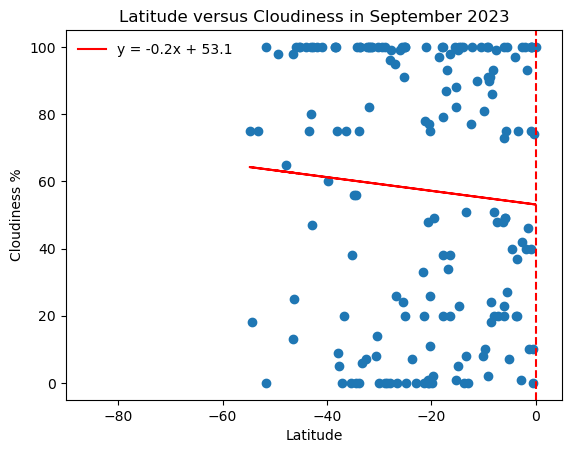

In [24]:
# Southern Hemisphere
lat_vs_cloud_reg_param_s, lat_vs_cloud_reg_s, lat_vs_cloud_eq_s = get_lin_regress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
fig9, ax9 = plt.subplots()
ax9.scatter(x=southern_hemi_df['Lat'], y=southern_hemi_df['Cloudiness'])
ax9.plot(southern_hemi_df['Lat'], lat_vs_cloud_reg_s, color='red', linestyle='solid', label=lat_vs_cloud_eq_s)
# Incorporate the other graph properties
ax9.set_xlabel("Latitude")
ax9.set_ylabel("Cloudiness %")
ax9.set_title("Latitude versus Cloudiness in September 2023")
ax9.set_xlim(-90, 5)
ax9.set_ylim(-5, 105)
ax9.axvline(0, linestyle='dashed', color='red')
ax9.legend(frameon=False, loc='best')
# Save the figure
plt.savefig("../output_data/Fig10.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** 
- There is no/weak correlation between Latitude and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

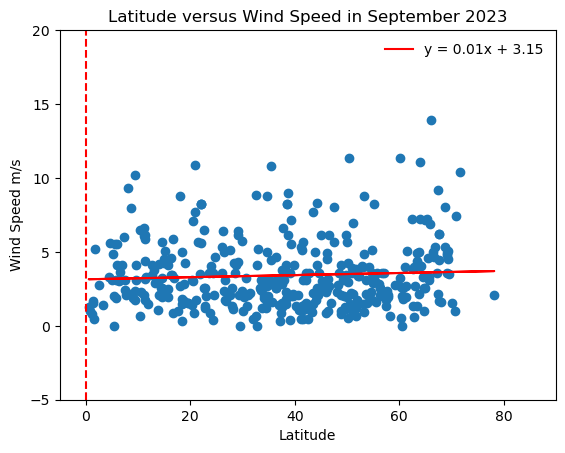

In [25]:
# Northern Hemisphere
lat_vs_wind_reg_param_n, lat_vs_wind_reg_n, lat_vs_wind_eq_n = get_lin_regress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
fig10, ax10 = plt.subplots()
ax10.scatter(x=northern_hemi_df['Lat'], y=northern_hemi_df['Wind Speed'])
ax10.plot(northern_hemi_df['Lat'], lat_vs_wind_reg_n, color='red', linestyle='solid', label=lat_vs_wind_eq_n)
# Incorporate the other graph properties
ax10.set_xlabel("Latitude")
ax10.set_ylabel("Wind Speed m/s")
ax10.set_title("Latitude versus Wind Speed in September 2023")
ax10.set_xlim(-5, 90)
ax10.set_ylim(-5, 20)
ax10.axvline(0, linestyle='dashed', color='red')
ax10.legend(frameon=False, loc='best')
# Save the figure
plt.savefig("../output_data/Fig11.png")
# Show plot
plt.show()

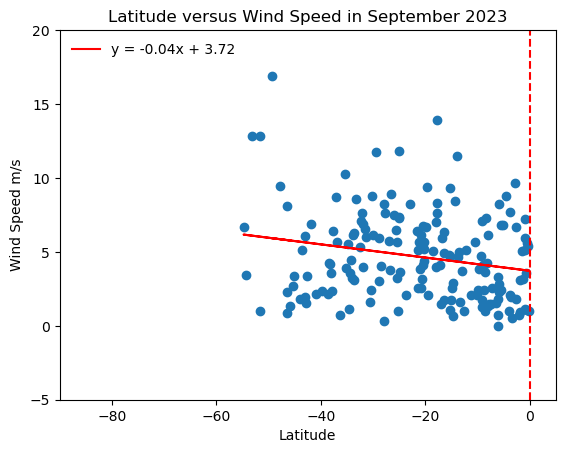

In [26]:
# Southern Hemisphere
lat_vs_wind_reg_param_s, lat_vs_wind_reg_s, lat_vs_wind_eq_s = get_lin_regress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
fig11, ax11 = plt.subplots()
ax11.scatter(x=southern_hemi_df['Lat'], y=southern_hemi_df['Wind Speed'])
ax11.plot(southern_hemi_df['Lat'], lat_vs_wind_reg_s, color='red', linestyle='solid', label=lat_vs_wind_eq_s)
# Incorporate the other graph properties
ax11.set_xlabel("Latitude")
ax11.set_ylabel("Wind Speed m/s")
ax11.set_title("Latitude versus Wind Speed in September 2023")
ax11.set_xlim(-90, 5)
ax11.set_ylim(-5, 20)
ax11.axvline(0, linestyle='dashed', color='red')
ax11.legend(frameon=False, loc='best')
# Save the figure
plt.savefig("../output_data/Fig12.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** 
- There is no correlation between Latitude and humidity